# BSDS Class Time Preferences

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv("../data/data.csv")
df.columns

Index(['Class', 'Blocks Or Stand Alone', 'Any comments or concerns?',
       'Block: Tuesday/Thursday morning block (9:30 AM-12:15 PM)',
       'Block: Monday/Wednesday morning block (9:30 AM-12:15 PM)',
       'Block: Monday/Wednesday afternoon block (2:00-4:45PM)',
       'Block: Tuesday/Thursday afternoon block (2:00-4:45PM)',
       'Stand Alone: Monday/Wednesday/Friday morning',
       'Stand Alone: Monday/Wednesday morning',
       'Stand Alone: Tuesday/Thursday morning',
       'Stand Alone: Monday/Wednesday afternoon',
       'Stand Alone: Tuesday/Thursday afternoon',
       'Stand Alone: Monday/Wednesday/Friday afternoon'],
      dtype='object')

## How many students filled out the form

In [25]:
second_year_count = (df["Class"] == "Class of 2028").sum()
third_year_count = (df["Class"] == "Class of 2027").sum()

In [26]:
print(f"{second_year_count} second years filled out the form. ")
print(f"{third_year_count} third years filled out the form. ")

13 second years filled out the form. 
15 third years filled out the form. 


## Stand alone Classes vs. Block Classes?

In [27]:
alone = (df["Blocks Or Stand Alone"] == "Stand alone Classes").sum()
block = (df["Blocks Or Stand Alone"] == "Blocks of Classes").sum()
type = pd.DataFrame({"Type": ["Alone", "Block"], 
                     "Count": [alone, block]})

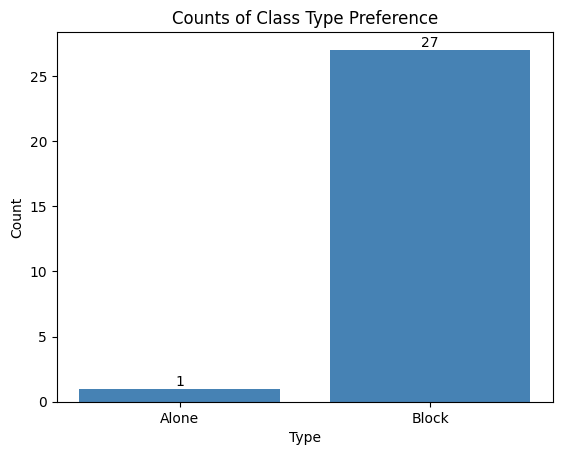

In [28]:
plt.bar(type["Type"], type["Count"], color = "steelblue")
for i, v in enumerate(type["Count"]):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Counts of Class Type Preference")
plt.xlabel("Type")
plt.ylabel("Count")

plt.savefig("../images/counts.png")
plt.show()

## Class Time Preferences?

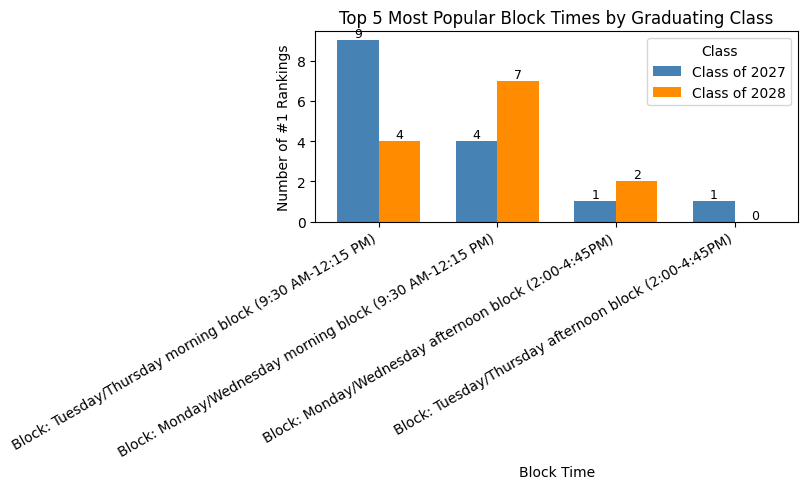

In [29]:
block_cols = [c for c in df.columns if c.startswith("Block:")]

# Count total #1 rankings per block
top_choice_counts = (df[block_cols] == 1).sum()

# Get top 5 block times
top_5 = top_choice_counts.sort_values(ascending=False).head(5)

# ---- Split counts by graduating class ----
class_values = sorted(df["Class"].unique())

counts_by_class = {
    cls: (df[df["Class"] == cls][top_5.index] == 1).sum()
    for cls in class_values
}

# ---- Plot grouped bar chart ----
x = np.arange(len(top_5.index))
width = 0.35

plt.figure(figsize=(8,5))

bars = []
colors = ["steelblue", "darkorange"]

for i, cls in enumerate(class_values):
    bars_cls = plt.bar(
        x + (i - 0.5) * width,
        counts_by_class[cls],
        width,
        label=str(cls),
        color=colors[i]
    )
    bars.append(bars_cls)

# ---- Add value labels ----
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            int(height),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Block Time")
plt.ylabel("Number of #1 Rankings")
plt.title("Top 5 Most Popular Block Times by Graduating Class")
plt.xticks(x, top_5.index, rotation=30, ha="right")
plt.legend(title="Class")

plt.tight_layout()
plt.savefig("../images/block.png")
plt.show()

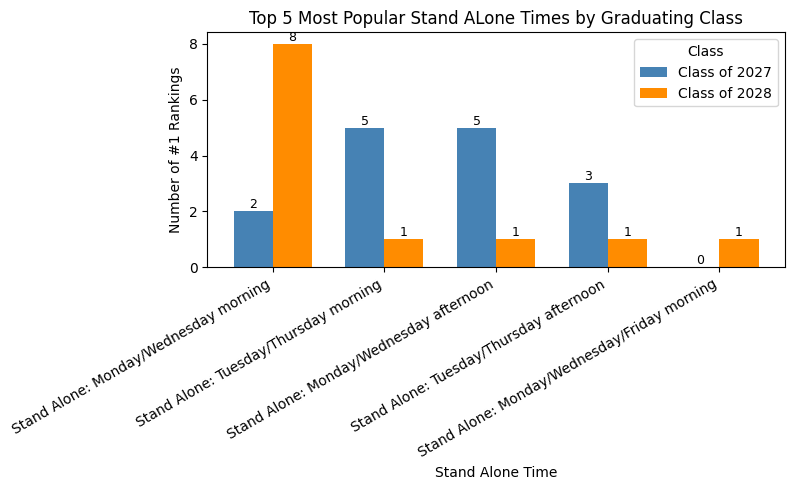

In [30]:
block_cols = [c for c in df.columns if c.startswith("Stand")]

# Count total #1 rankings per block
top_choice_counts = (df[block_cols] == 1).sum()

# Get top 5 block times
top_5 = top_choice_counts.sort_values(ascending=False).head(5)

# ---- Split counts by graduating class ----
class_values = sorted(df["Class"].unique())

counts_by_class = {
    cls: (df[df["Class"] == cls][top_5.index] == 1).sum()
    for cls in class_values
}

# ---- Plot grouped bar chart ----
x = np.arange(len(top_5.index))
width = 0.35

plt.figure(figsize=(8,5))

bars = []
colors = ["steelblue", "darkorange"]

for i, cls in enumerate(class_values):
    bars_cls = plt.bar(
        x + (i - 0.5) * width,
        counts_by_class[cls],
        width,
        label=str(cls),
        color=colors[i]
    )
    bars.append(bars_cls)

# ---- Add value labels ----
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            int(height),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Stand Alone Time")
plt.ylabel("Number of #1 Rankings")
plt.title("Top 5 Most Popular Stand ALone Times by Graduating Class")
plt.xticks(x, top_5.index, rotation=30, ha="right")
plt.legend(title="Class")

plt.tight_layout()
plt.savefig("../images/stand.png")
plt.show()